In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(['Year','Month','order_id','order_item_id','order_date'], axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(['month_date'], axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


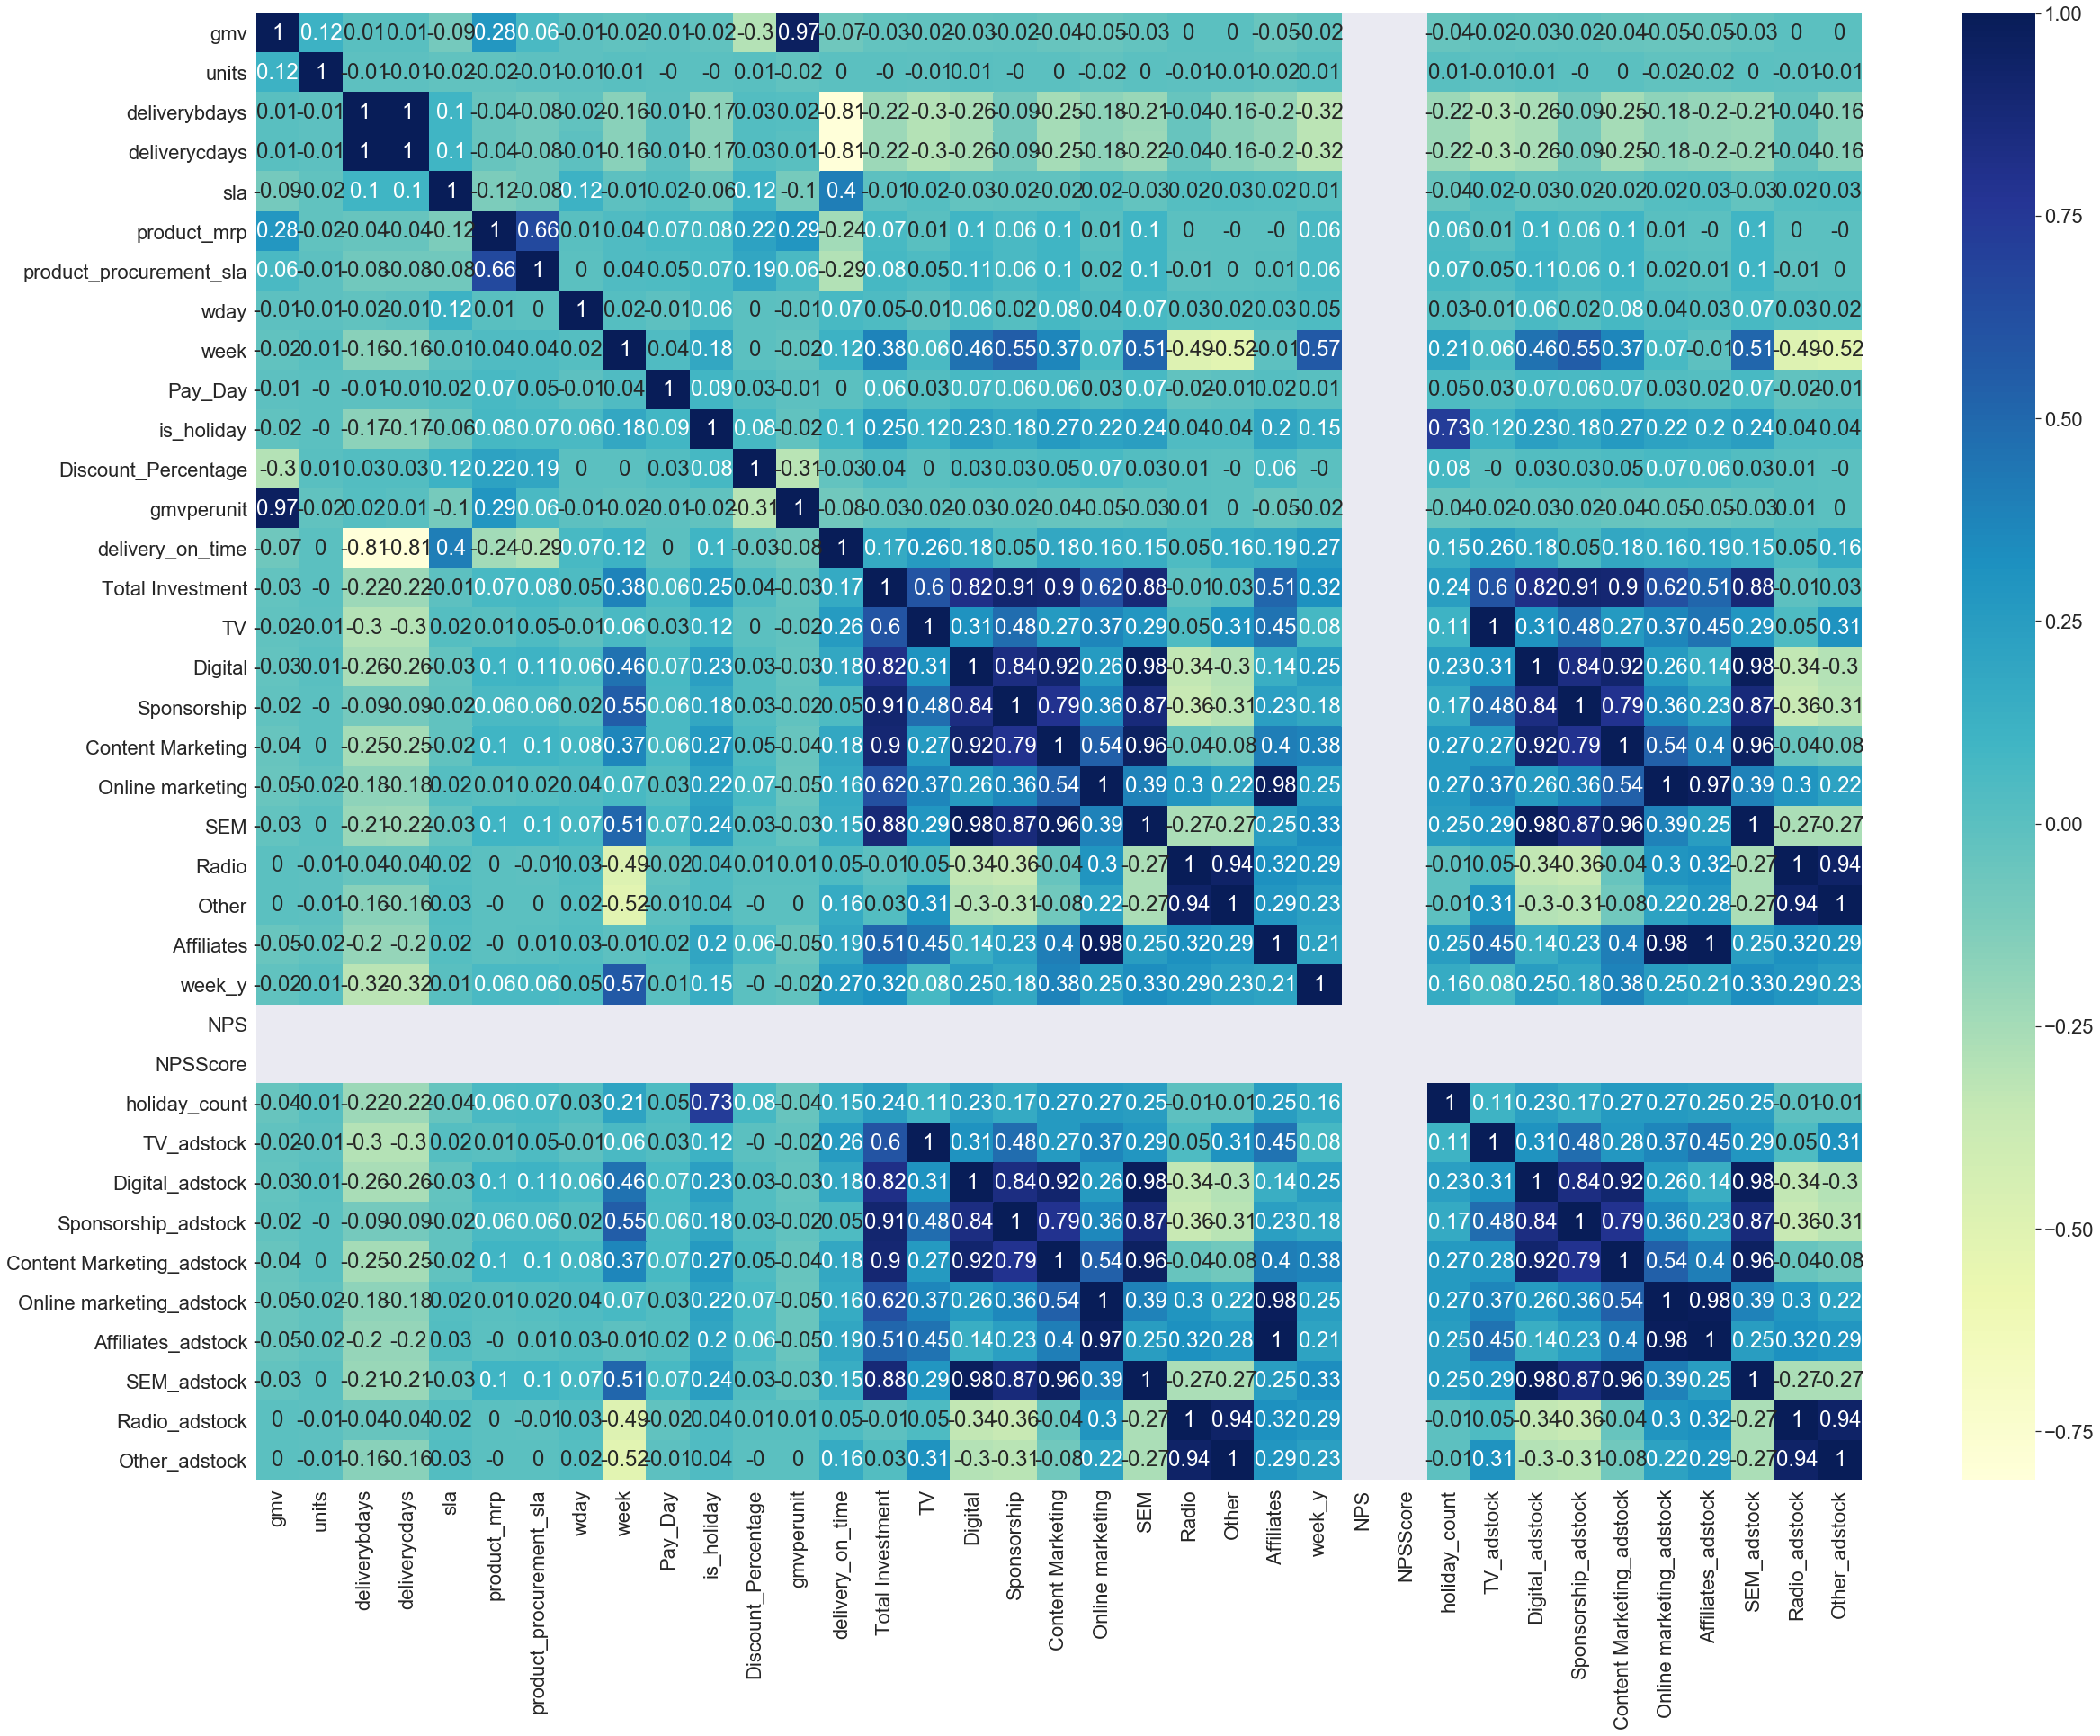

In [7]:
#plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [8]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,0.00,Luxury
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,0.00,Luxury


In [9]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'delivery_on_time', 'delivery_status',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Radio', 'Other', ' Affiliates', 'week_y',
       'NPS', 'NPSScore', 'holiday_count', 'ItemType'],
      dtype='object')

In [10]:
GamingAccessory.isnull().sum()

gmv                                   0
units                                 0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
wday                                  0
week                                  0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0


In [11]:
GamingAccessory['NPS'] = GamingAccessory['NPS'].fillna(0)
GamingAccessory['NPSScore'] = GamingAccessory['NPSScore'].fillna(0)

In [12]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
week                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
week_y              

In [13]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [14]:
GamingAccessory.shape

(170712, 33)

In [15]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,24.86,0.07,0.20,...,"1,926,717.12","43,343,295.63","20,183,731.52","1,172,797.93","11,904,502.32","13,684,660.51",28.02,0.00,0.00,1.15
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,16.82,0.25,0.40,...,"2,298,367.99","13,847,355.77","19,652,221.74","1,964,867.99","20,597,714.25","4,006,399.16",17.13,0.00,0.00,1.65
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,1.00,0.00,0.00,...,14.28,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",5.00,0.00,0.00,0.00
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,10.00,0.00,0.00,...,"393,477.44","41,633,783.21","9,846,568.91",0.00,0.00,"14,039,892.47",13.00,0.00,0.00,0.00
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,21.00,0.00,0.00,...,"1,440,481.70","48,016,056.55","11,763,933.86",0.00,0.00,"15,390,121.96",22.00,0.00,0.00,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,42.00,0.00,0.00,...,"2,032,258.06","51,709,677.42","15,603,225.81","1,964,516.13","11,260,967.74","15,605,218.38",44.00,0.00,0.00,3.00
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,53.00,1.00,1.00,...,"7,776,943.00","55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",53.00,0.00,0.00,6.00


In [16]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [17]:
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00,Luxury
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00,Luxury
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury


In [18]:
GamingAccessory.shape

(106810, 33)

In [19]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [20]:
# Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00


In [21]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns),axis=1)

In [23]:
GamingAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00


In [24]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 52 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   week                                             106810 non-null  int64  
 8   Pay_Day                                          106810 non-null  int64  
 9   is_holiday     

In [26]:
#missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
week                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing               

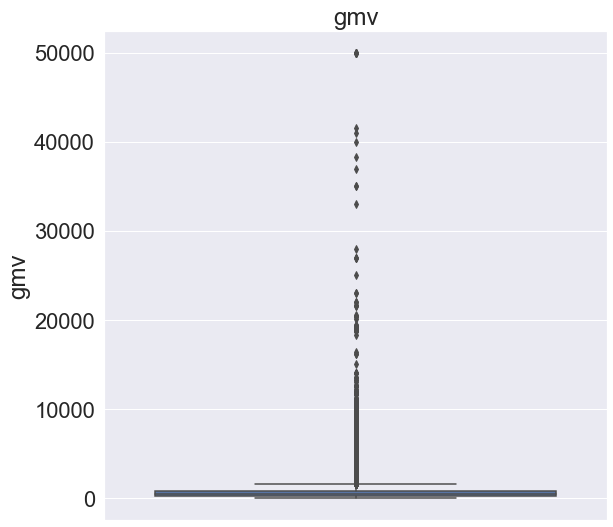

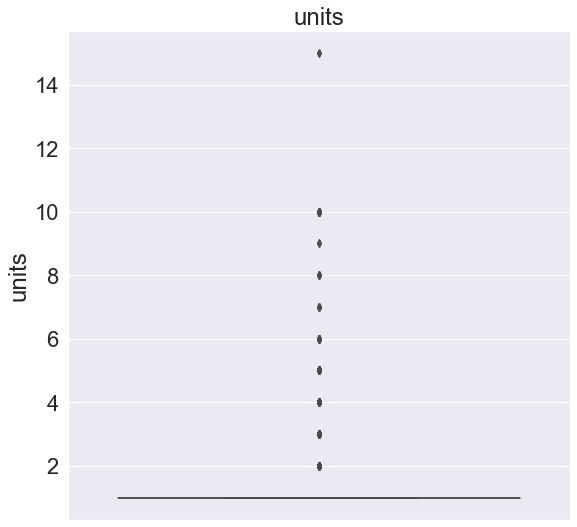

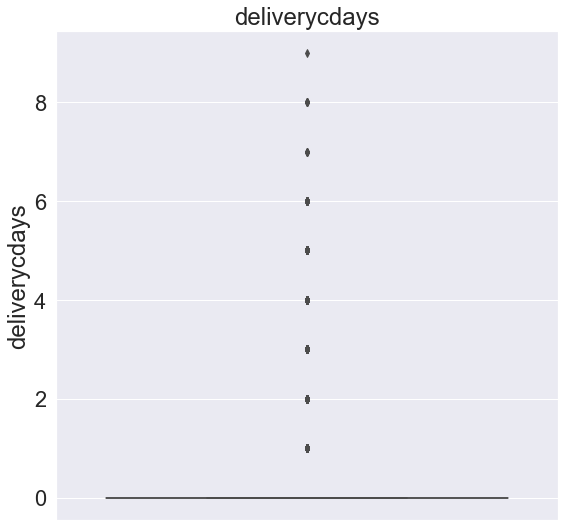

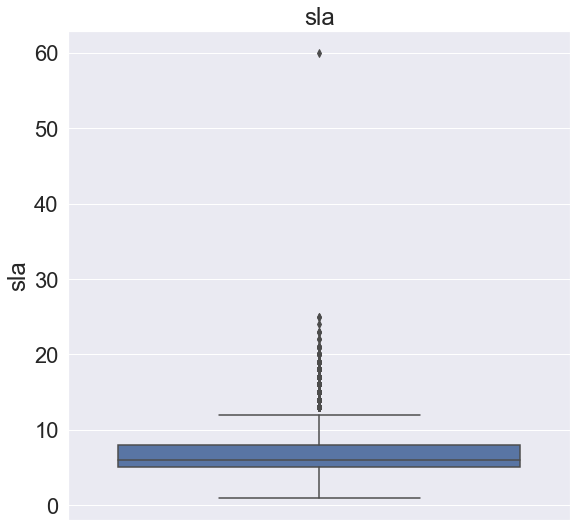

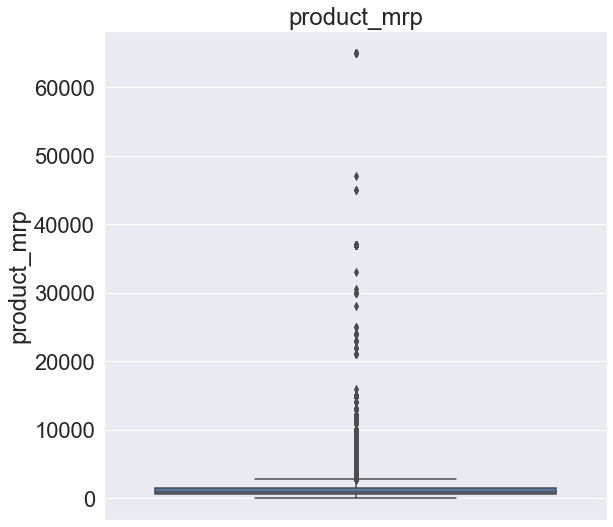

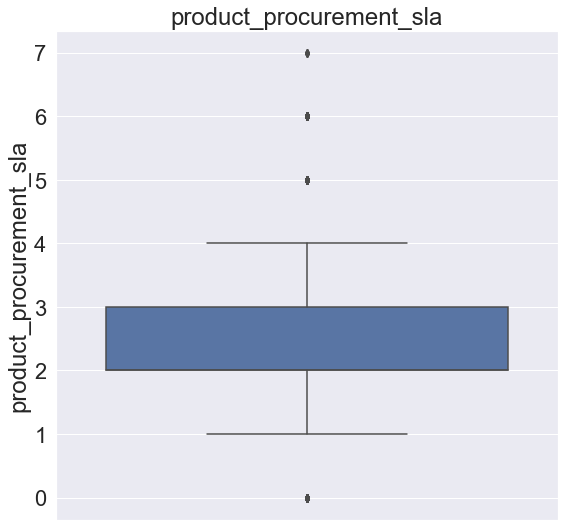

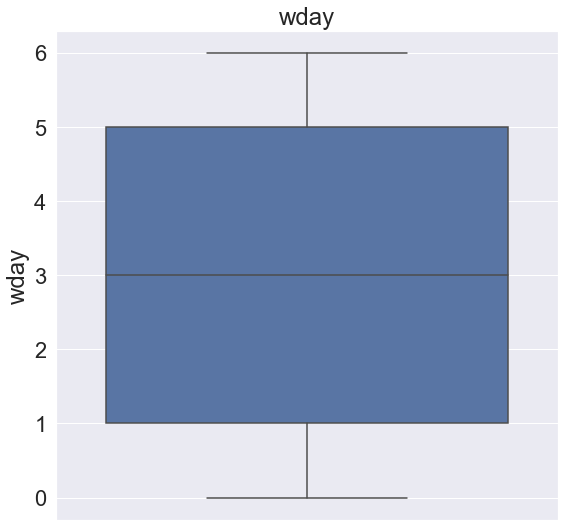

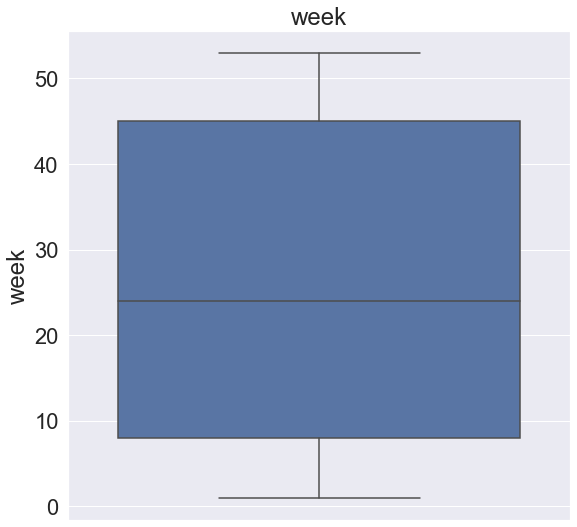

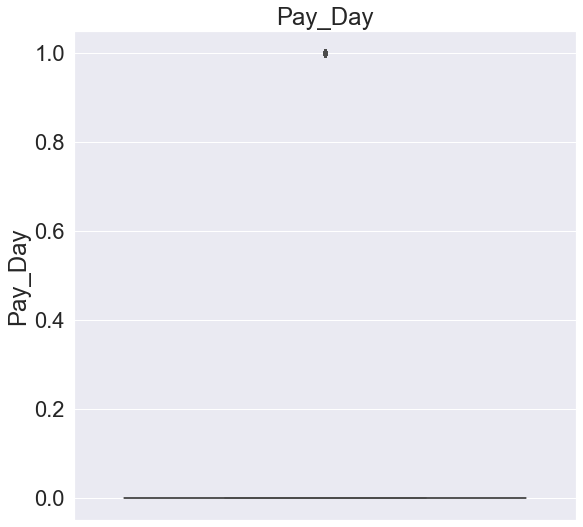

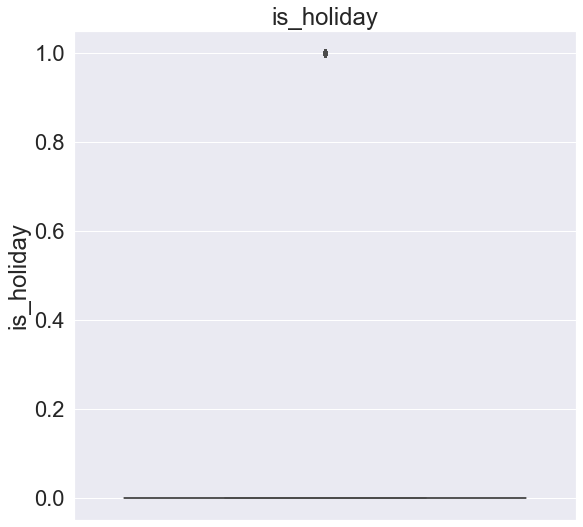

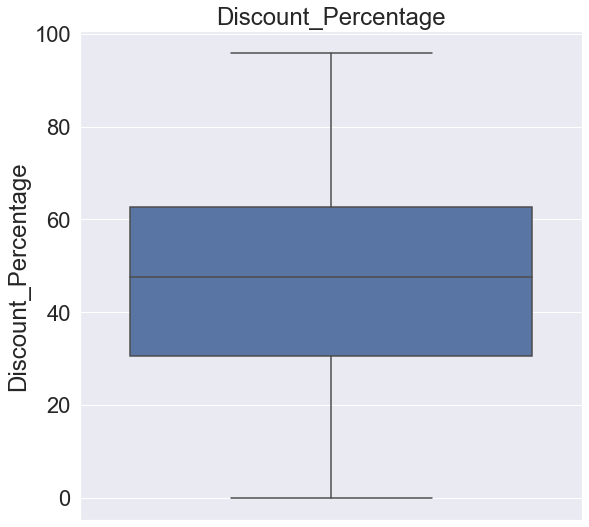

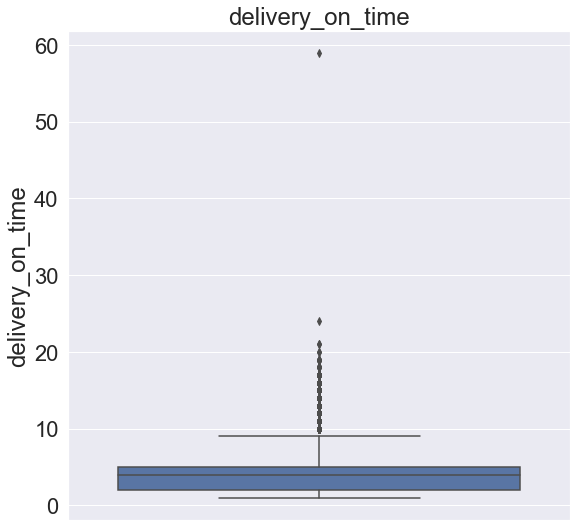

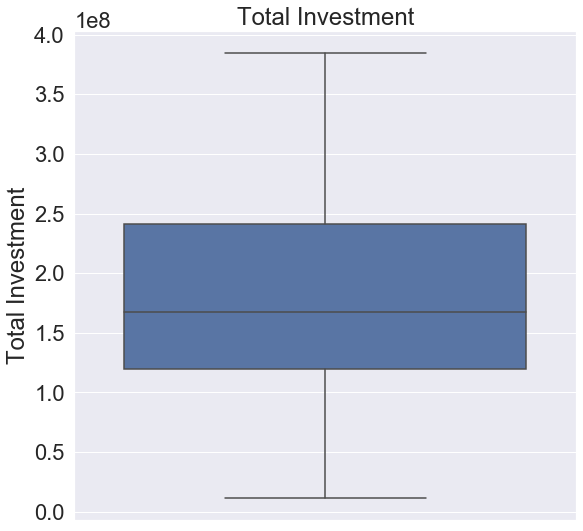

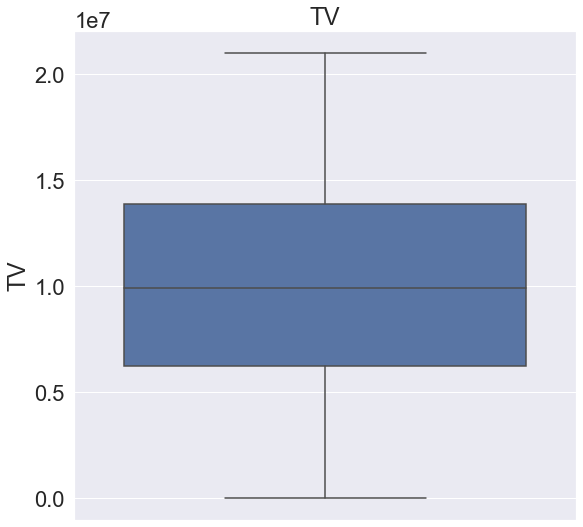

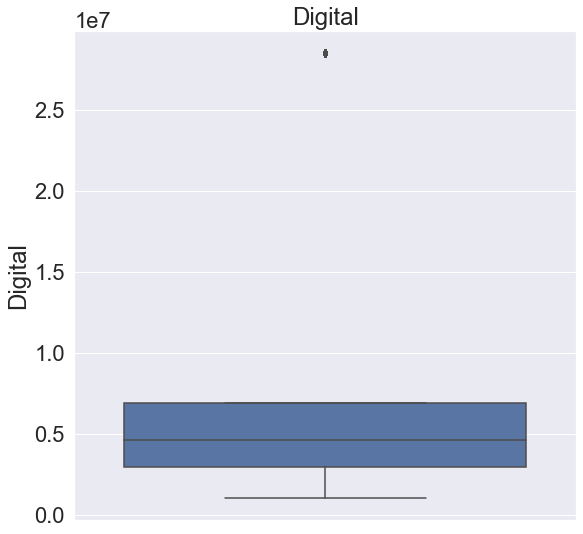

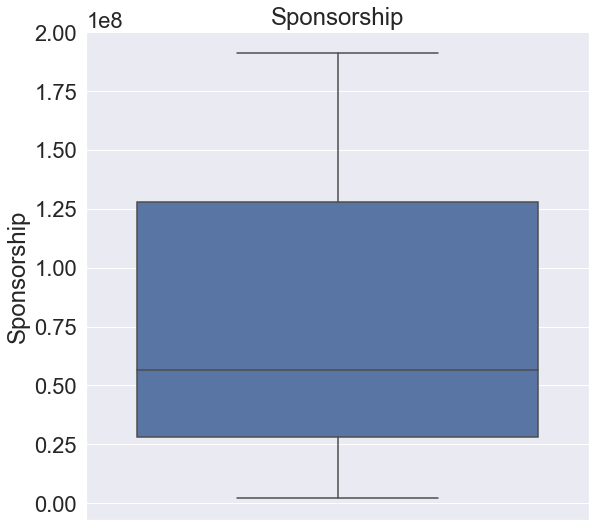

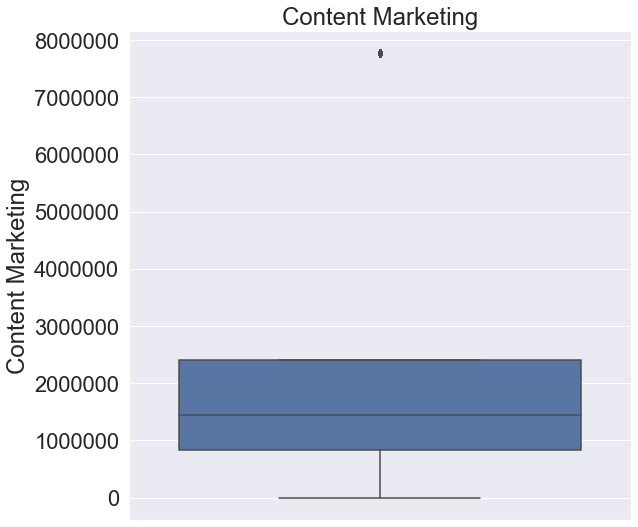

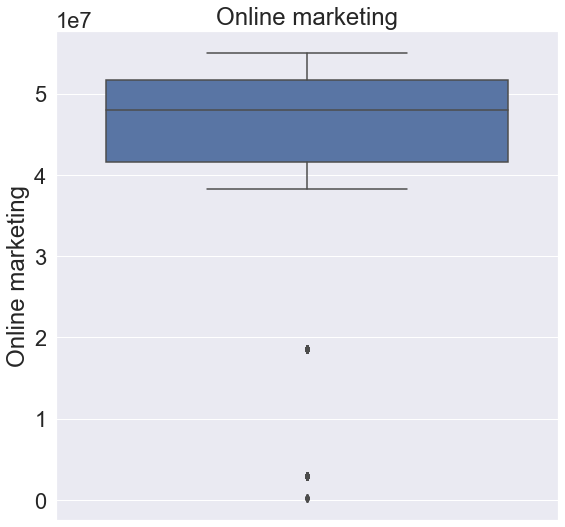

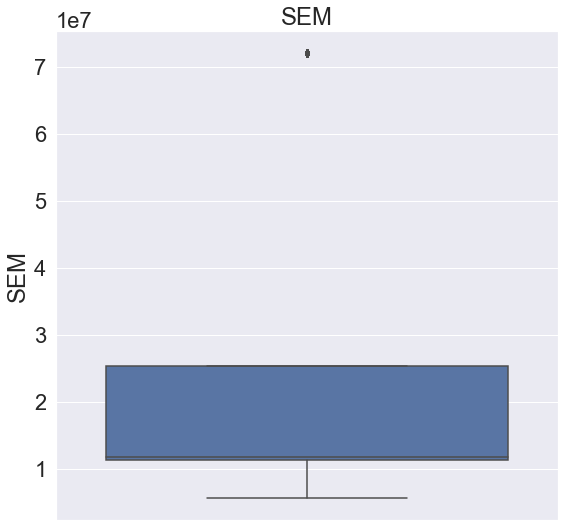

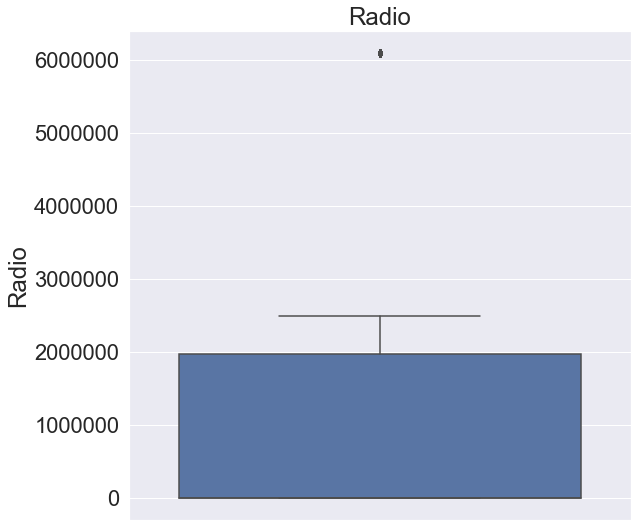

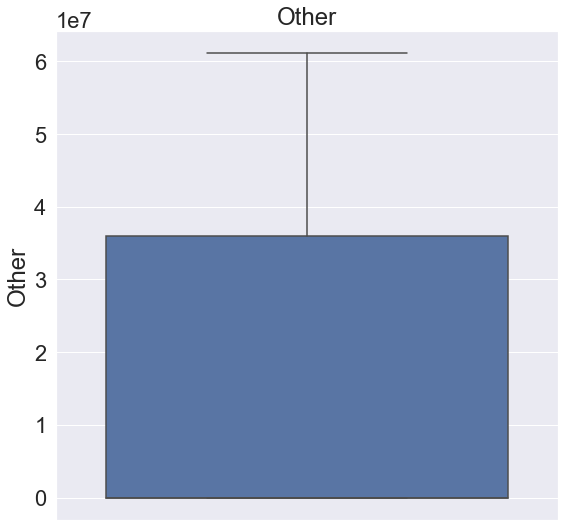

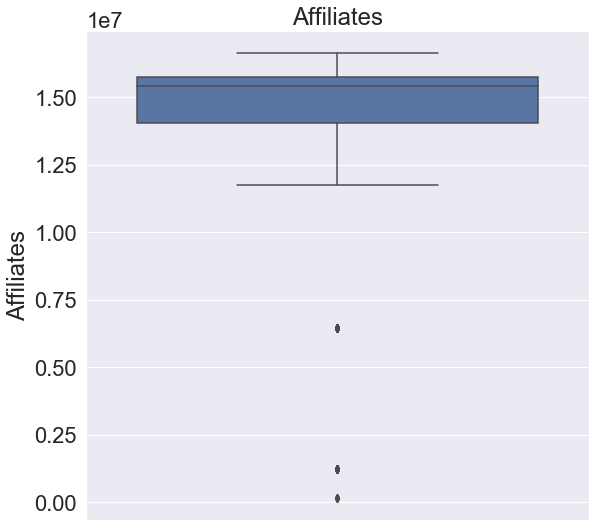

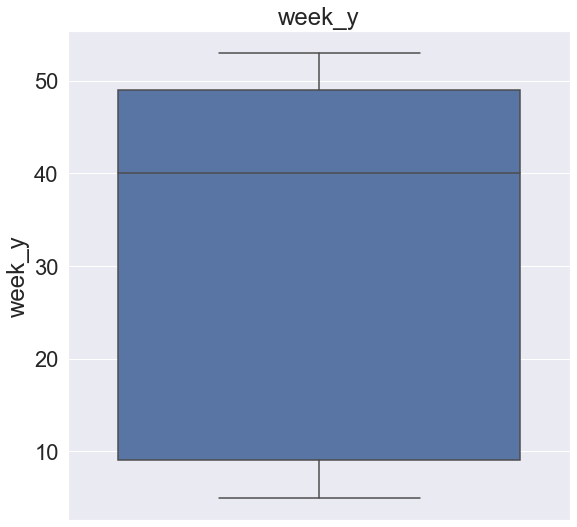

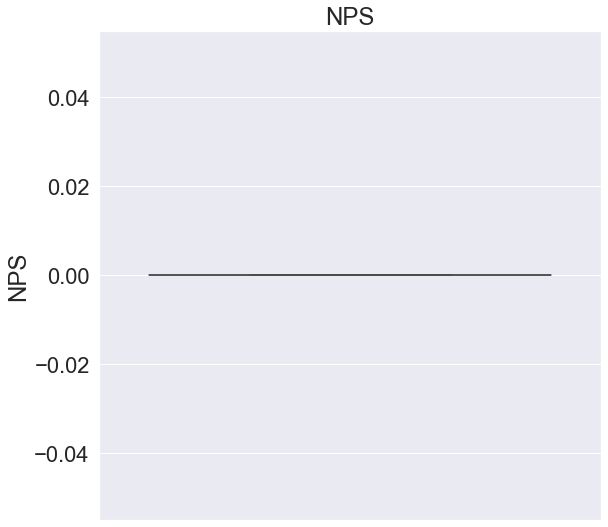

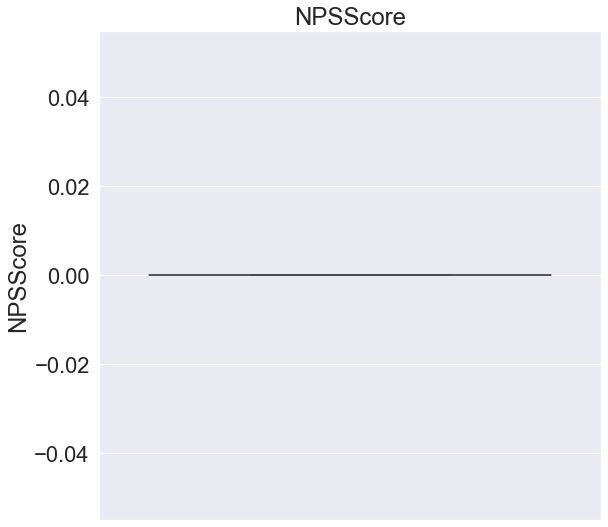

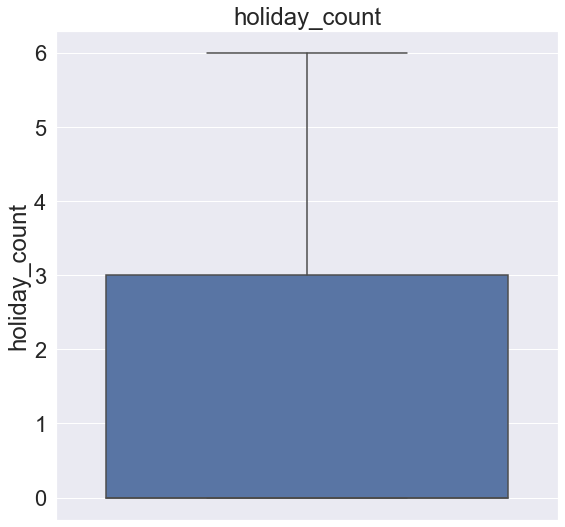

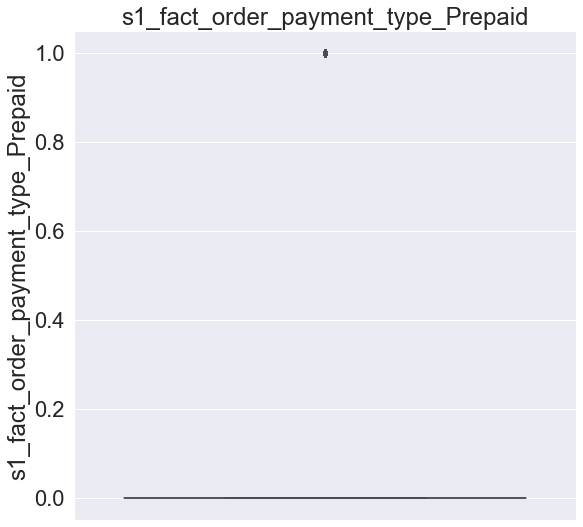

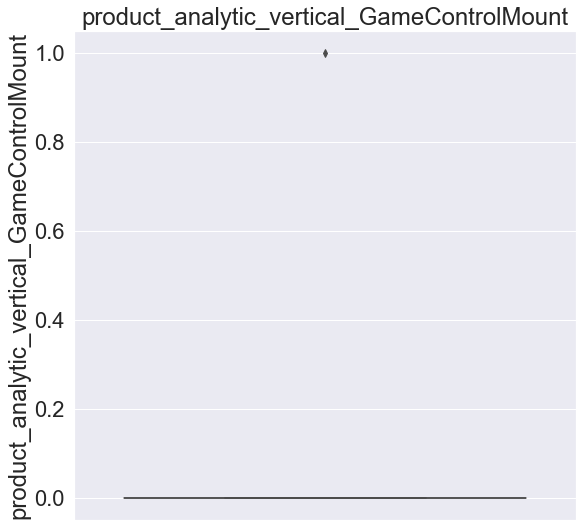

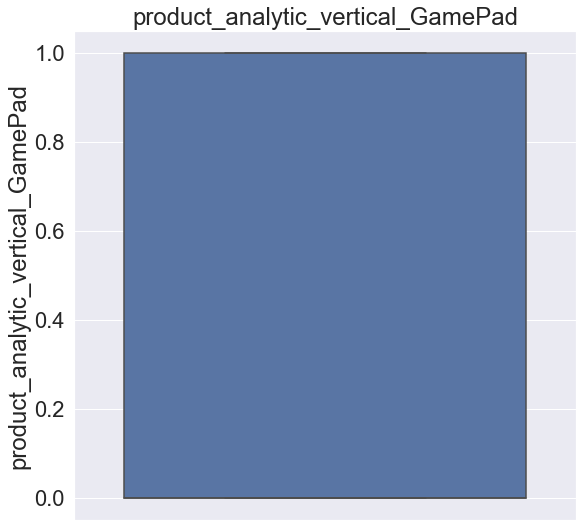

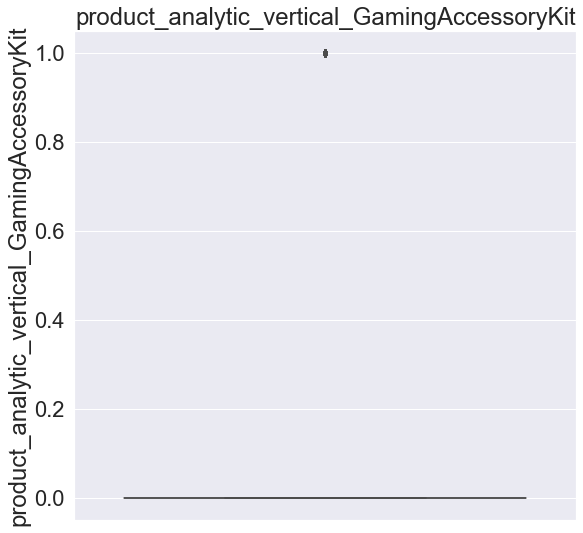

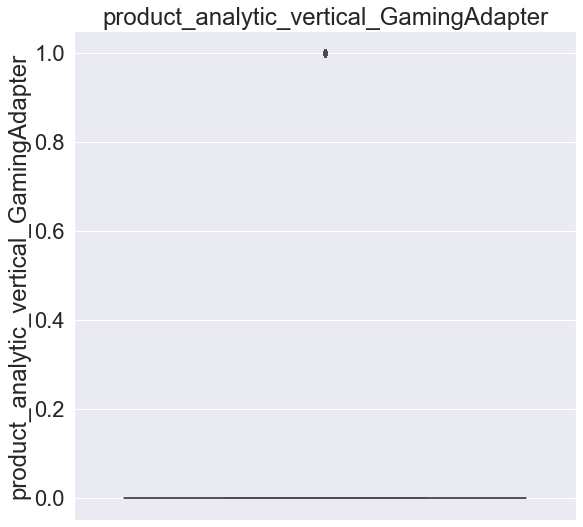

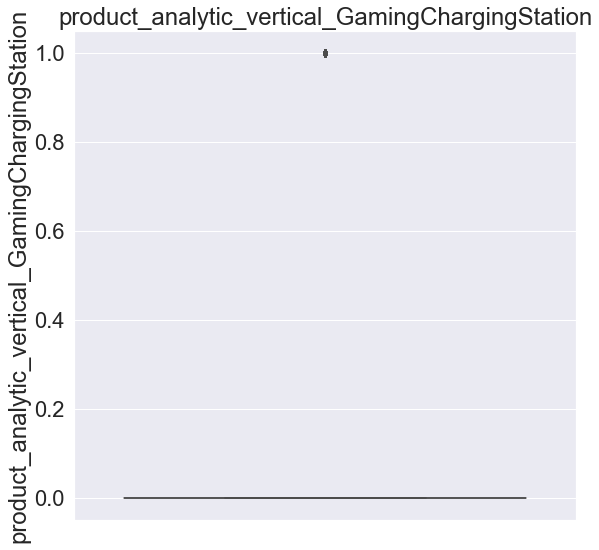

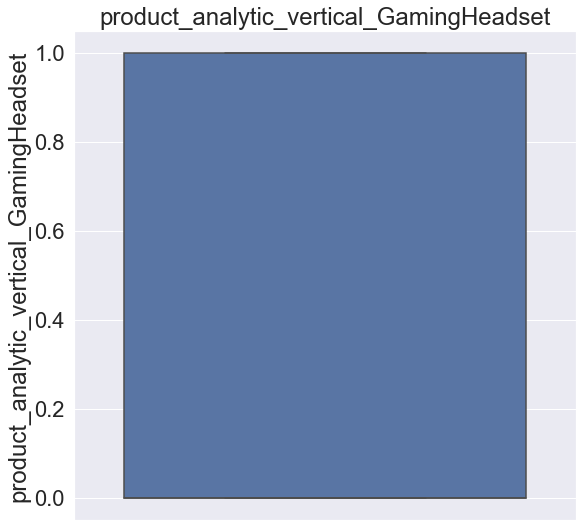

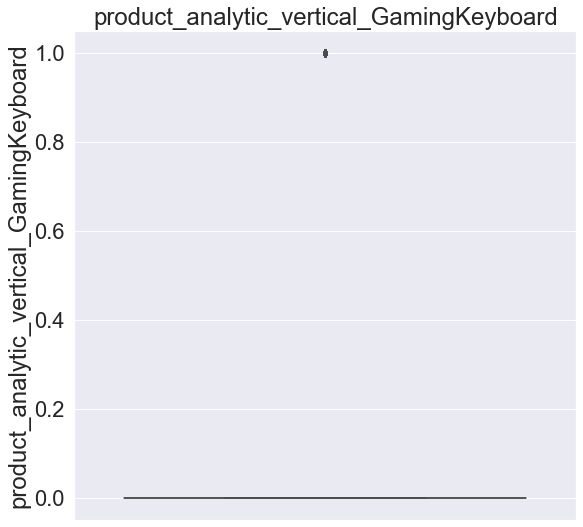

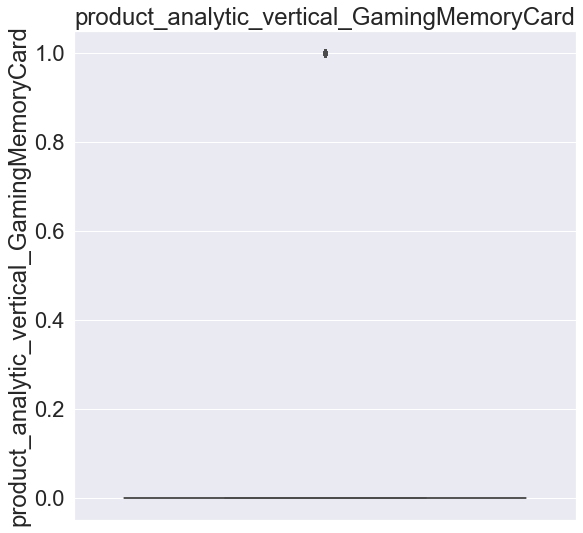

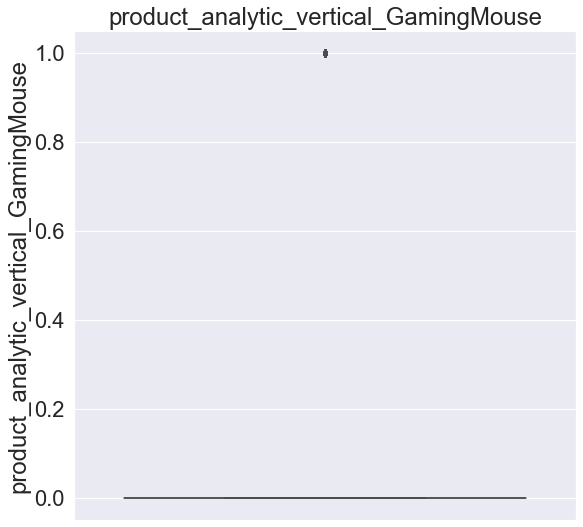

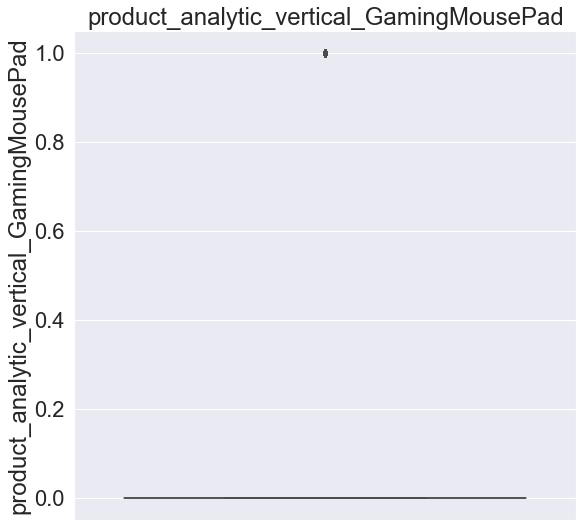

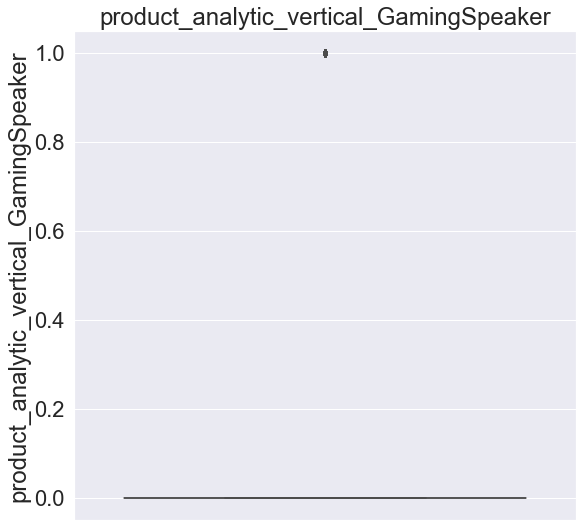

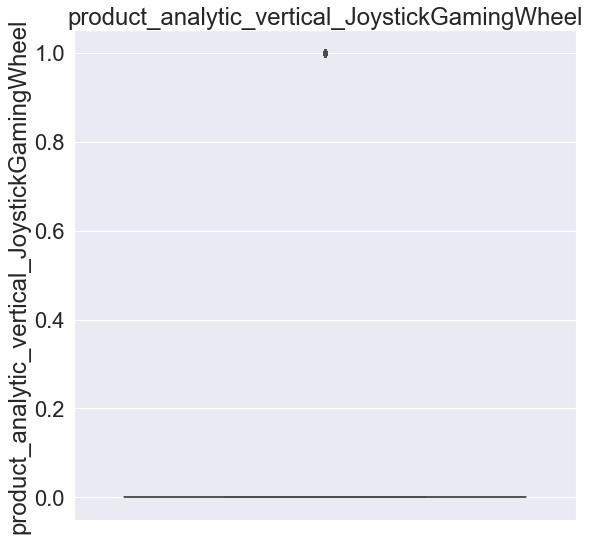

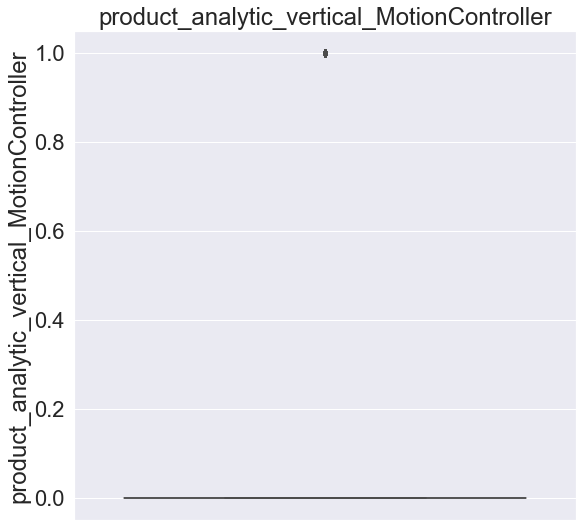

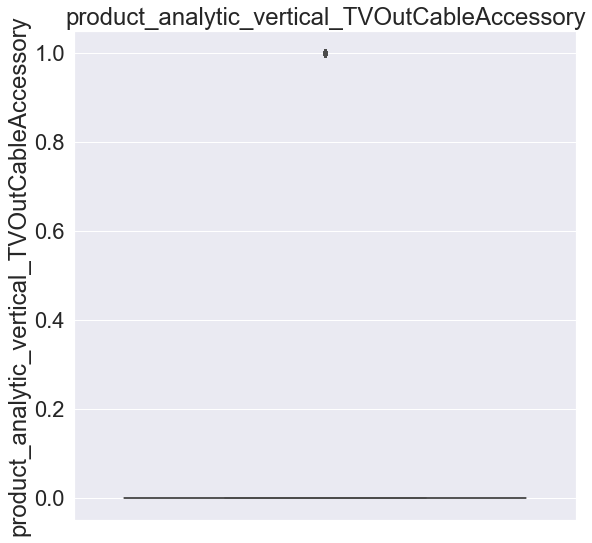

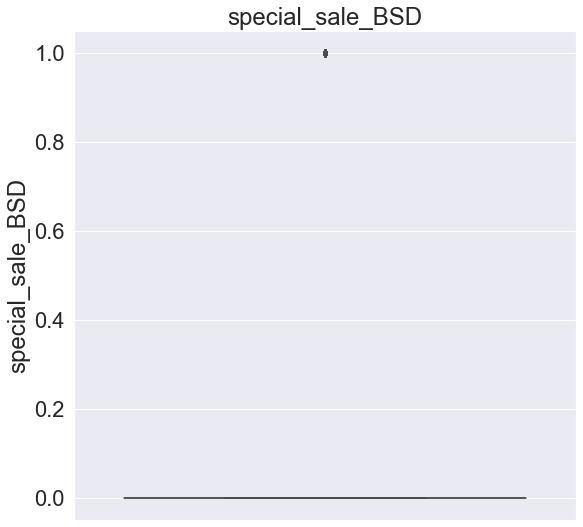

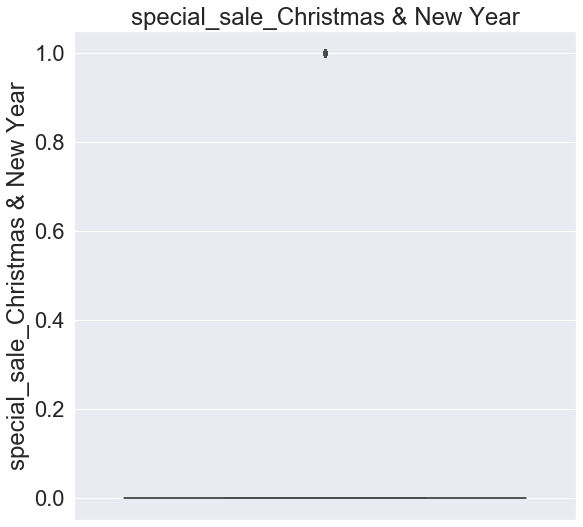

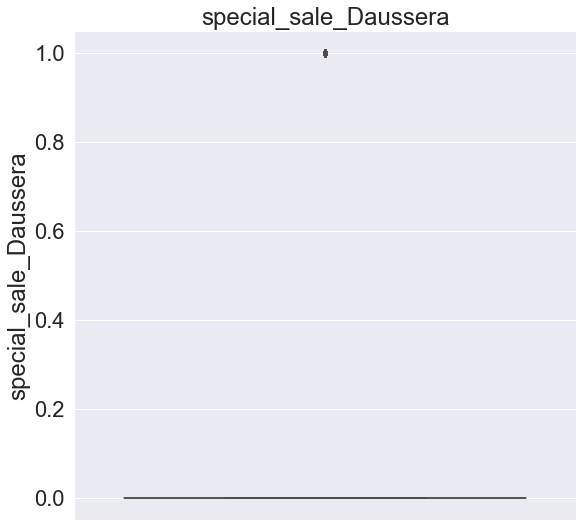

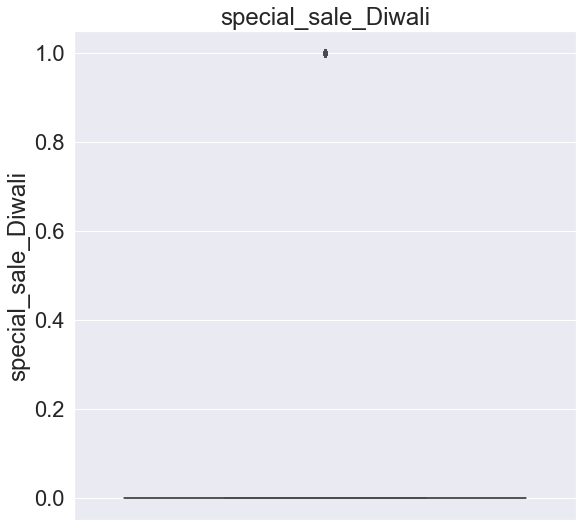

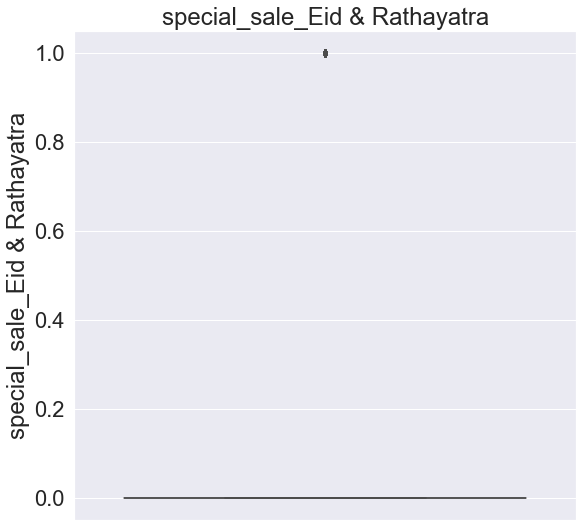

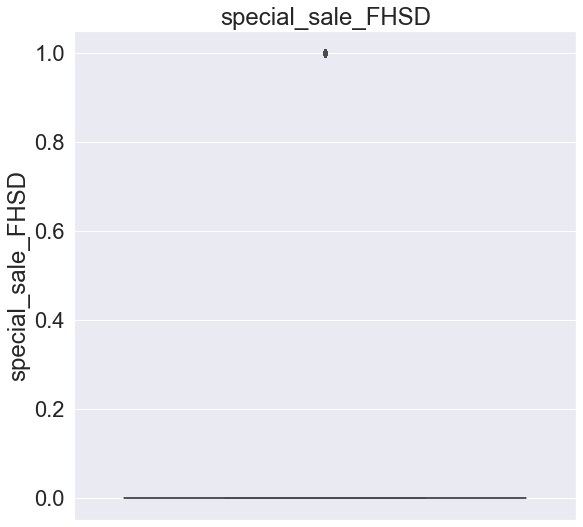

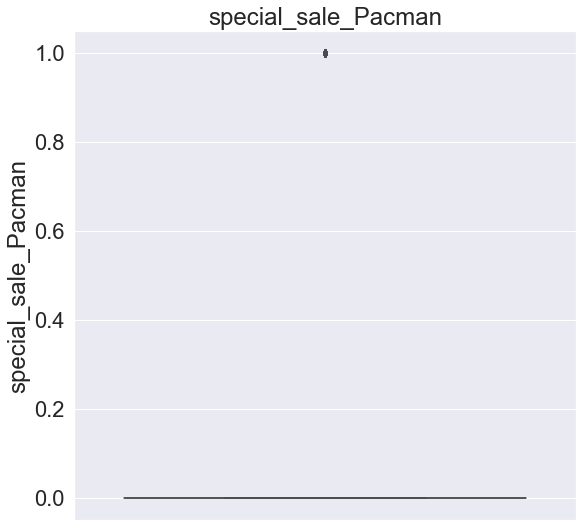

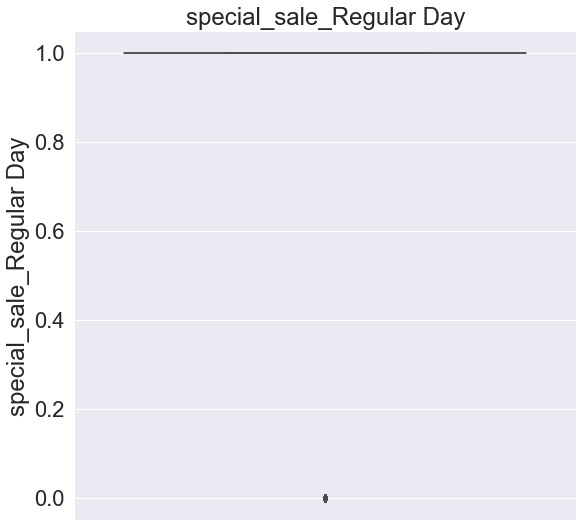

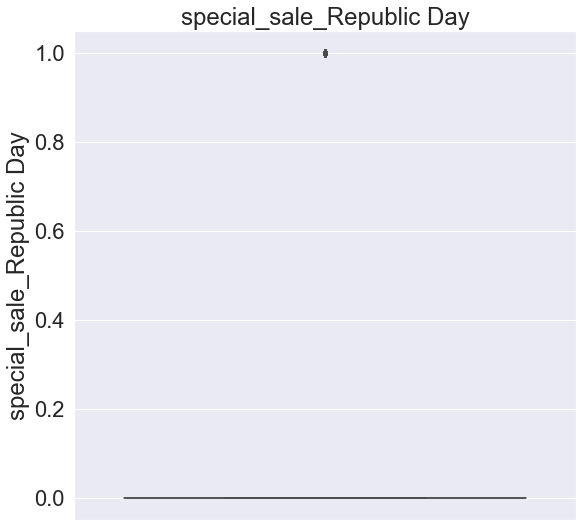

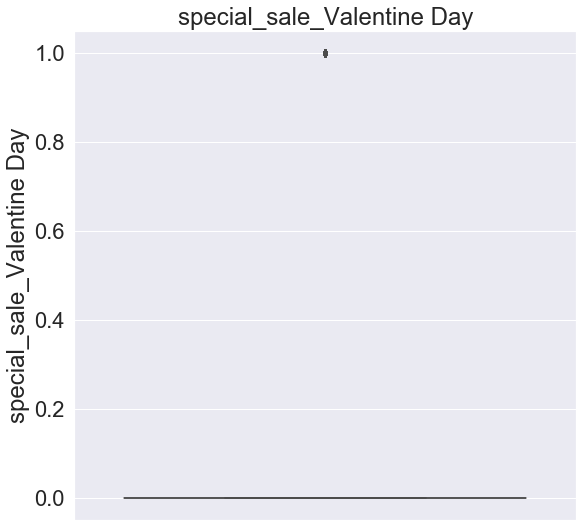

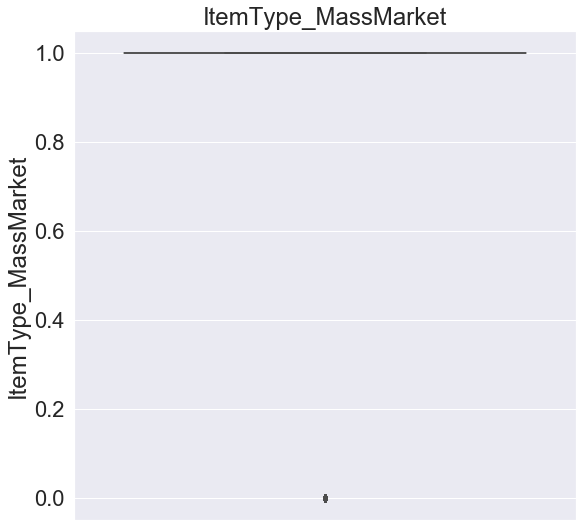

In [27]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)

In [28]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [30]:
for col in outlier_cols:
        remove_outlier(GA, col)

In [31]:
GA.shape

(106810, 52)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 52 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   week                                             106810 non-null  int64  
 8   Pay_Day                                          106810 non-null  int64  
 9   is_holiday     

In [37]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [38]:
# Create a list of the variables that you need to scale
varlist1 = ['gmv', 'units', 'deliverycdays', 'sla','product_mrp', 'product_procurement_sla', 'wday', 'week',
           'Discount_Percentage', 'delivery_on_time', 'Total Investment', 'TV',
           'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other', 'Affiliates', 'NPS',
           'NPSScore', 'holiday_count', 'Pay_Day', 'is_holiday']

# 'Pay_Day', 'is_holiday'

In [39]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [40]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0.96,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0.17,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0.21,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0.77,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0.98,0.00,1.00,...,1,0,0,0,0,0,0,0,0,1


In [41]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.53890897e-01 -2.12604013e-02  2.88748936e-02  7.84939861e-01
 -5.90221324e-03 -1.01679313e-05  4.36691443e-04  1.82423214e-04
 -7.14352319e-04 -2.57950529e-02 -2.46856568e-02 -5.76512423e+00
  6.14340074e-02 -6.27538264e-01  2.89366517e+00  7.96248765e-02
  3.87056290e-01  2.30581118e+00 -9.73611737e-08  1.64414821e+00
  6.95718715e-01 -1.15226029e-03  2.47003033e-10 -3.07399668e-10
  2.31946442e-05 -7.82728383e-05 -2.35965014e-04 -1.97669988e-03
  6.05013409e-04  1.02656828e-03 -1.11770532e-03 -4.35601890e-04
 -3.70757017e-04  4.29878176e-04 -5.73425311e-04 -9.90229897e-04
 -1.19165267e-02  3.46383535e-03  1.72271828e-03 -8.86013694e-04
  9.12160510e-04 -7.42947328e-04  7.25672949e-04  7.39902581e-04
  1.52487028e-03  8.62947756e-04  1.21025013e-03 -2.13601734e-04
  1.38270764e-03  6.97535320e-04 -1.21000010e-02]
0.09732307664825868


In [44]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True False False False False False  True  True  True
 False  True  True  True False  True False  True  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False  True]
[ 1  1  1  1  2 34 23 30 19  1  1  1  7  1  1  1 14  1 35  1  1 32 37 36
 33 31 29  5  8  6 20 26 27 11 25 22  1  3  4 24 13 21 17 18  9 15 12 28
 10 16  1]


In [45]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,deliverycdays,sla,product_mrp,Discount_Percentage,delivery_on_time,Total Investment,Digital,Sponsorship,Content Marketing,SEM,Other,Affiliates,product_analytic_vertical_GamingSpeaker,ItemType_MassMarket
36102,1.00,0.00,0.00,0.25,0.03,0.72,0.05,0.62,0.21,0.67,0.31,0.29,0.00,0.93,0,1
98899,1.00,0.00,0.00,0.12,0.03,0.47,0.15,0.58,0.14,0.48,0.11,0.09,0.59,0.84,0,1
93860,1.00,0.07,0.00,0.21,0.00,0.33,0.20,0.58,0.14,0.48,0.11,0.09,0.59,0.84,0,1
637,1.00,0.00,0.00,0.29,0.03,0.73,0.10,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0,1
41231,1.00,0.00,0.00,0.21,0.02,0.62,0.20,0.62,0.21,0.67,0.31,0.29,0.00,0.93,0,1


In [46]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 4.640e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:53:21   Log-Likelihood:             2.6167e+05
No. Observations:               74767   AIC:                        -5.233e+05
Df Residuals:                   74751   BIC:                        -5.232e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Total Investment,"51,898.55"
9,Sponsorship,"25,742.85"
12,Other,"4,469.91"
11,SEM,"3,063.89"
13,Affiliates,"1,756.56"
8,Digital,810.33
0,const,306.42
10,Content Marketing,103.19
3,sla,4.58
6,delivery_on_time,4.50


In [51]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 4.969e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:54:58   Log-Likelihood:             2.6165e+05
No. Observations:               74767   AIC:                        -5.233e+05
Df Residuals:                   74752   BIC:                        -5.231e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0199      0.000     89.493      0.000       0.020       0.020
units                                       0.1518      0.001    106.373      0.000       0.149       0.155
deliverycdays                              -0.0066      0.001     -5.840      0.000      -0.009      -0.004
sla                                         0.0085      0.001     14.757      0.000       0.007       0.010
product_mrp                                 0.7843      0.001    551.450      0.000       0.781       0.787
Discount_Percentage                        -0.0249      0.000   -202.647      0.000      -0.025      -0.025
delivery_on_time                           -0.0075      0.000    -15.711      0.000      -0.008      -0.007
Digital                                     0.0088      0.001     14.653      0.000       0.008       0.010
Sponsorship                                -0.0007      0.000     -3.773      0.000      -0.001      -0.000
Content Marketing                          -0.0044      0.001     -6.958      0.000      -0.006      -0.003
SEM                                        -0.0038      0.001     -3.800      0.000      -0.006      -0.002
Other                                    7.852e-05      0.000      0.698      0.485      -0.000       0.000
Affiliates                                  0.0025      0.000     13.919      0.000       0.002       0.003
product_analytic_vertical_GamingSpeaker    -0.0114      0.001    -20.363      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0120      0.000    -76.906      0.000      -0.012      -0.012
==============================================================================
Omnibus:                    95657.971   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        352102172.288
Skew:                           6.007   Prob(JB):                         0.00
Kurtosis:                     338.975   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
10,SEM,145.63
0,const,69.43
9,Content Marketing,55.14
7,Digital,52.87
8,Sponsorship,5.93
3,sla,4.58
6,delivery_on_time,4.49
11,Other,2.50
12,Affiliates,2.29
14,ItemType_MassMarket,1.81


In [53]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.350e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:55:36   Log-Likelihood:             2.6165e+05
No. Observations:               74767   AIC:                        -5.233e+05
Df Residuals:                   74753   BIC:                        -5.231e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0199      0.000     89.465      0.000       0.019       0.020
units                                       0.1518      0.001    106.341      0.000       0.149       0.155
deliverycdays                              -0.0067      0.001     -5.948      0.000      -0.009      -0.005
sla                                         0.0086      0.001     14.865      0.000       0.007       0.010
product_mrp                                 0.7842      0.001    551.395      0.000       0.781       0.787
Discount_Percentage                        -0.0249      0.000   -202.773      0.000      -0.025      -0.025
delivery_on_time                           -0.0076      0.000    -15.846      0.000      -0.009      -0.007
Digital                                     0.0072      0.000     16.762      0.000       0.006       0.008
Sponsorship                                -0.0012      0.000     -7.411      0.000      -0.002      -0.001
Content Marketing                          -0.0063      0.000    -15.363      0.000      -0.007      -0.005
Other                                       0.0003   9.58e-05      3.153      0.002       0.000       0.000
Affiliates                                  0.0026      0.000     14.538      0.000       0.002       0.003
product_analytic_vertical_GamingSpeaker    -0.0114      0.001    -20.362      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0120      0.000    -76.946      0.000      -0.012      -0.012
==============================================================================
Omnibus:                    95700.344   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        352456580.459
Skew:                           6.013   Prob(JB):                         0.00
Kurtosis:                     339.144   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,69.43
7,Digital,27.09
9,Content Marketing,22.76
3,sla,4.57
6,delivery_on_time,4.49
8,Sponsorship,3.89
11,Affiliates,2.25
10,Other,1.82
13,ItemType_MassMarket,1.81
4,product_mrp,1.71


In [55]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          6.793e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:56:16   Log-Likelihood:                      2.5784e+05
No. Observations:               74767   AIC:                                 -5.157e+05
Df Residuals:                   74754   BIC:                                 -5.155e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1553      0.002    103.449      0.000       0.152       0.158
deliverycdays                              -0.0117      0.001     -9.890      0.000      -0.014      -0.009
sla                                         0.0241      0.001     41.560      0.000       0.023       0.025
product_mrp                                 0.8535      0.001    680.192      0.000       0.851       0.856
Discount_Percentage                        -0.0250      0.000   -194.140      0.000      -0.025      -0.025
delivery_on_time                           -0.0159      0.000    -32.076      0.000      -0.017      -0.015
Digital                                     0.0223      0.000     53.213      0.000       0.021       0.023
Sponsorship                                -0.0017      0.000    -10.363      0.000      -0.002      -0.001
Content Marketing                          -0.0215      0.000    -54.707      0.000      -0.022      -0.021
Other                                       0.0021   9.86e-05     21.159      0.000       0.002       0.002
Affiliates                                  0.0116      0.000     76.953      0.000       0.011       0.012
product_analytic_vertical_GamingSpeaker    -0.0130      0.001    -22.047      0.000      -0.014      -0.012
ItemType_MassMarket                        -0.0025      0.000    -20.716      0.000      -0.003      -0.002
==============================================================================
Omnibus:                    60724.274   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        186730829.913
Skew:                           2.393   Prob(JB):                         0.00
Kurtosis:                     247.780   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,Digital,35.60
8,Content Marketing,34.84
2,sla,25.48
10,Affiliates,22.78
12,ItemType_MassMarket,17.22
5,delivery_on_time,12.00
7,Sponsorship,9.26
4,Discount_Percentage,6.16
9,Other,2.41
3,product_mrp,1.95


In [57]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          7.068e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:56:59   Log-Likelihood:                      2.5645e+05
No. Observations:               74767   AIC:                                 -5.129e+05
Df Residuals:                   74755   BIC:                                 -5.128e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1563      0.002    102.191      0.000       0.153       0.159
deliverycdays                              -0.0158      0.001    -13.113      0.000      -0.018      -0.013
sla                                         0.0278      0.001     47.534      0.000       0.027       0.029
product_mrp                                 0.8678      0.001    694.957      0.000       0.865       0.870
Discount_Percentage                        -0.0254      0.000   -193.174      0.000      -0.026      -0.025
delivery_on_time                           -0.0183      0.001    -36.444      0.000      -0.019      -0.017
Sponsorship                                 0.0022      0.000     14.019      0.000       0.002       0.002
Content Marketing                          -0.0023      0.000    -14.544      0.000      -0.003      -0.002
Other                                      -0.0005   8.75e-05     -5.563      0.000      -0.001      -0.000
Affiliates                                  0.0070      0.000     55.540      0.000       0.007       0.007
product_analytic_vertical_GamingSpeaker    -0.0142      0.001    -23.651      0.000      -0.015      -0.013
ItemType_MassMarket                     -9.113e-05      0.000     -0.803      0.422      -0.000       0.000
==============================================================================
Omnibus:                    52962.163   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        161552542.631
Skew:                           1.793   Prob(JB):                         0.00
Kurtosis:                     230.695   Cond. No.                         81.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,sla,25.10
9,Affiliates,15.12
11,ItemType_MassMarket,14.80
5,delivery_on_time,11.90
6,Sponsorship,7.50
4,Discount_Percentage,6.14
7,Content Marketing,5.54
3,product_mrp,1.86
8,Other,1.83
1,deliverycdays,1.11


In [59]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          7.379e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:57:30   Log-Likelihood:                      2.5494e+05
No. Observations:               74767   AIC:                                 -5.099e+05
Df Residuals:                   74756   BIC:                                 -5.098e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1561      0.002    100.041      0.000       0.153       0.159
deliverycdays                              -0.0197      0.001    -16.081      0.000      -0.022      -0.017
sla                                         0.0330      0.001     55.905      0.000       0.032       0.034
product_mrp                                 0.8896      0.001    735.383      0.000       0.887       0.892
Discount_Percentage                        -0.0248      0.000   -185.608      0.000      -0.025      -0.025
delivery_on_time                           -0.0216      0.001    -42.416      0.000      -0.023      -0.021
Sponsorship                                 0.0028      0.000     17.832      0.000       0.003       0.003
Content Marketing                          -0.0005      0.000     -3.266      0.001      -0.001      -0.000
Other                                       0.0011   8.43e-05     13.320      0.000       0.001       0.001
product_analytic_vertical_GamingSpeaker    -0.0146      0.001    -23.866      0.000      -0.016      -0.013
ItemType_MassMarket                         0.0035    9.5e-05     36.977      0.000       0.003       0.004
==============================================================================
Omnibus:                    41085.205   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        141082655.877
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                     215.800   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,sla,24.47
5,delivery_on_time,11.73
10,ItemType_MassMarket,9.96
6,Sponsorship,7.46
4,Discount_Percentage,6.11
7,Content Marketing,5.31
3,product_mrp,1.68
8,Other,1.63
1,deliverycdays,1.11
0,units,1.02


In [61]:
X_train_rfe1 = X_train_rfe1.drop('sla', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          7.761e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:58:19   Log-Likelihood:                      2.5341e+05
No. Observations:               74767   AIC:                                 -5.068e+05
Df Residuals:                   74757   BIC:                                 -5.067e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1559      0.002     97.876      0.000       0.153       0.159
deliverycdays                               0.0009      0.001      0.784      0.433      -0.001       0.003
product_mrp                                 0.9070      0.001    760.176      0.000       0.905       0.909
Discount_Percentage                        -0.0234      0.000   -174.609      0.000      -0.024      -0.023
delivery_on_time                            0.0033      0.000     13.282      0.000       0.003       0.004
Sponsorship                                 0.0033      0.000     20.604      0.000       0.003       0.004
Content Marketing                          -0.0006      0.000     -3.662      0.000      -0.001      -0.000
Other                                       0.0015   8.57e-05     17.779      0.000       0.001       0.002
product_analytic_vertical_GamingSpeaker    -0.0151      0.001    -24.171      0.000      -0.016      -0.014
ItemType_MassMarket                         0.0057   8.84e-05     64.390      0.000       0.006       0.006
==============================================================================
Omnibus:                    34542.705   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        130618592.451
Skew:                           0.358   Prob(JB):                         0.00
Kurtosis:                     207.763   Cond. No.                         65.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,ItemType_MassMarket,8.28
5,Sponsorship,7.43
3,Discount_Percentage,5.88
6,Content Marketing,5.31
4,delivery_on_time,2.73
7,Other,1.62
2,product_mrp,1.57
0,units,1.02
1,deliverycdays,1.01
8,product_analytic_vertical_GamingSpeaker,1.01


In [63]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          8.570e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:58:59   Log-Likelihood:                      2.5320e+05
No. Observations:               74767   AIC:                                 -5.064e+05
Df Residuals:                   74758   BIC:                                 -5.063e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1561      0.002     97.749      0.000       0.153       0.159
deliverycdays                               0.0016      0.001      1.307      0.191      -0.001       0.004
product_mrp                                 0.9114      0.001    774.125      0.000       0.909       0.914
Discount_Percentage                        -0.0233      0.000   -173.879      0.000      -0.024      -0.023
delivery_on_time                            0.0035      0.000     13.784      0.000       0.003       0.004
Content Marketing                           0.0021   9.63e-05     21.895      0.000       0.002       0.002
Other                                       0.0009      8e-05     10.981      0.000       0.001       0.001
product_analytic_vertical_GamingSpeaker    -0.0152      0.001    -24.352      0.000      -0.016      -0.014
ItemType_MassMarket                         0.0062   8.46e-05     73.719      0.000       0.006       0.006
==============================================================================
Omnibus:                    33760.781   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        130494722.041
Skew:                           0.245   Prob(JB):                         0.00
Kurtosis:                     207.666   Cond. No.                         62.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,ItemType_MassMarket,7.54
3,Discount_Percentage,5.88
4,delivery_on_time,2.73
5,Content Marketing,1.85
2,product_mrp,1.52
6,Other,1.40
0,units,1.02
1,deliverycdays,1.01
7,product_analytic_vertical_GamingSpeaker,1.01


In [65]:
X_train_rfe1 = X_train_rfe1.drop('Discount_Percentage', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                          6.596e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:59:54   Log-Likelihood:                      2.4050e+05
No. Observations:               74767   AIC:                                 -4.810e+05
Df Residuals:                   74759   BIC:                                 -4.809e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1534      0.002     81.046      0.000       0.150       0.157
deliverycdays                               0.0016      0.001      1.154      0.248      -0.001       0.004
product_mrp                                 0.8533      0.001    637.811      0.000       0.851       0.856
delivery_on_time                            0.0017      0.000      5.706      0.000       0.001       0.002
Content Marketing                           0.0018      0.000     15.656      0.000       0.002       0.002
Other                                       0.0006   9.48e-05      6.502      0.000       0.000       0.001
product_analytic_vertical_GamingSpeaker    -0.0166      0.001    -22.352      0.000      -0.018      -0.015
ItemType_MassMarket                        -0.0041   7.12e-05    -57.917      0.000      -0.004      -0.004
==============================================================================
Omnibus:                    36186.929   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42094567.895
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                     119.231   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,ItemType_MassMarket,3.80
3,delivery_on_time,2.73
4,Content Marketing,1.85
5,Other,1.40
2,product_mrp,1.39
0,units,1.02
1,deliverycdays,1.01
6,product_analytic_vertical_GamingSpeaker,1.00


In [67]:
X_train_rfe1 = X_train_rfe1.drop('ItemType_MassMarket', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          7.169e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        01:00:36   Log-Likelihood:                      2.3886e+05
No. Observations:               74767   AIC:                                 -4.777e+05
Df Residuals:                   74760   BIC:                                 -4.776e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1463      0.002     75.803      0.000       0.143       0.150
deliverycdays                              -0.0052      0.001     -3.613      0.000      -0.008      -0.002
product_mrp                                 0.8474      0.001    621.461      0.000       0.845       0.850
delivery_on_time                           -0.0087      0.000    -35.705      0.000      -0.009      -0.008
Content Marketing                          -0.0012      0.000    -11.749      0.000      -0.001      -0.001
Other                                      -0.0011   9.21e-05    -11.785      0.000      -0.001      -0.001
product_analytic_vertical_GamingSpeaker    -0.0169      0.001    -22.271      0.000      -0.018      -0.015
==============================================================================
Omnibus:                    43503.660   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38405312.410
Skew:                           1.367   Prob(JB):                         0.00
Kurtosis:                     113.998   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,delivery_on_time,1.74
4,Content Marketing,1.47
2,product_mrp,1.39
5,Other,1.27
0,units,1.01
1,deliverycdays,1.00
6,product_analytic_vertical_GamingSpeaker,1.00


In [69]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

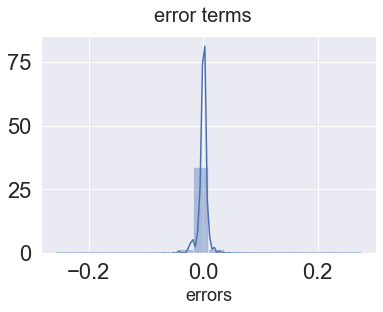

In [70]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [71]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [72]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [73]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [74]:
X_test_rfe2.columns

Index(['units', 'deliverycdays', 'sla', 'product_mrp', 'Discount_Percentage',
       'delivery_on_time', 'Total Investment', 'Digital', 'Sponsorship',
       'Content Marketing', 'SEM', 'Other', 'Affiliates',
       'product_analytic_vertical_GamingSpeaker', 'ItemType_MassMarket'],
      dtype='object')

In [75]:
X_train_rfe1.columns

Index(['units', 'deliverycdays', 'product_mrp', 'delivery_on_time',
       'Content Marketing', 'Other',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [76]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [77]:
X_test_rfe2.columns

Index(['units', 'deliverycdays', 'product_mrp', 'delivery_on_time',
       'Content Marketing', 'Other',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [78]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    32043 non-null  float64
 1   deliverycdays                            32043 non-null  float64
 2   product_mrp                              32043 non-null  float64
 3   delivery_on_time                         32043 non-null  float64
 4   Content Marketing                        32043 non-null  float64
 5   Other                                    32043 non-null  float64
 6   product_analytic_vertical_GamingSpeaker  32043 non-null  uint8  
dtypes: float64(6), uint8(1)
memory usage: 1.7 MB


In [79]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [80]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 7)
(74767, 7)


Text(0, 0.5, 'y_pred')

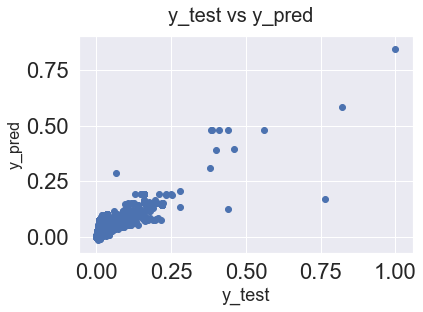

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [82]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7994849893367324

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.009960941710712946

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [86]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
regr.score(X_test, y_test)

0.893187188766532

In [88]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.90966099 0.90619892 0.88770264 0.90105719 0.90827047]
Mean and std deviation:  0.9025780437814535 0.007990908428267078


0.893187188766532

In [89]:
accuracy

0.8899436609830823

In [90]:
scores

array([0.90966099, 0.90619892, 0.88770264, 0.90105719, 0.90827047])

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9025998761624197
0.1


In [92]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028800924D08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.902600261544241
0.11922696508715391


In [93]:
# model with optimal alpha
lm = Ridge(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9046188461510241
0.8931984247885614


In [94]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.007269688178913033
